# Tests sur les architectures d'AutoEncoders 

### Chargement des modules necessaires

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from data import load_usps_from_pkl
from modules import Sequential, Linear, Tanh, Sigmoide, LogSoftmax
from losses import MSELoss, BCELoss, NLLLoss
from optimizer import SGD
import matplotlib.pyplot as plt
from Evalu_Visu import plot_reconstruction
from sklearn.preprocessing import StandardScaler

### Données


In [5]:
X, y = load_usps_from_pkl("usps.pkl")
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0) 
#ici le *255 car la fonction fais une normalisations, alors que en suite on fera un scaling entre -1 et 1

### Normalisation

In [6]:
# normalisation avec standard scaler
scaler = StandardScaler()
scaler.fit(X_train * 255.0) # le *255 car la fonction de base normalise déja entre  [0, 1]
X_train_scaled = scaler.transform(X_train * 255.0)
X_test_scaled = scaler.transform(X_test * 255.0)

## Auto-Encoder 1

In [66]:
encodeur = Sequential(
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 48, init_type=1),
    Tanh()
)

decodeur = Sequential(
    Linear(48, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Tanh()
)

autoencoder = Sequential(*encodeur.modules, *decodeur.modules)

Epoch 1/200, Loss: 205.4030
Epoch 2/200, Loss: 174.2500
Epoch 3/200, Loss: 165.3585
Epoch 4/200, Loss: 150.2405
Epoch 5/200, Loss: 143.7668
Epoch 6/200, Loss: 142.2854
Epoch 7/200, Loss: 138.2648
Epoch 8/200, Loss: 134.5156
Epoch 9/200, Loss: 132.2361
Epoch 10/200, Loss: 130.9609
Epoch 11/200, Loss: 129.9391
Epoch 12/200, Loss: 126.9299
Epoch 13/200, Loss: 126.4454
Epoch 14/200, Loss: 124.9043
Epoch 15/200, Loss: 125.3746
Epoch 16/200, Loss: 125.0059
Epoch 17/200, Loss: 125.0539
Epoch 18/200, Loss: 124.9208
Epoch 19/200, Loss: 126.2092
Epoch 20/200, Loss: 126.5873
Epoch 21/200, Loss: 126.2143
Epoch 22/200, Loss: 124.2015
Epoch 23/200, Loss: 125.9718
Epoch 24/200, Loss: 125.4633
Epoch 25/200, Loss: 124.7972
Epoch 26/200, Loss: 123.5317
Epoch 27/200, Loss: 123.2035
Epoch 28/200, Loss: 123.2805
Epoch 29/200, Loss: 123.2985
Epoch 30/200, Loss: 123.2749
Epoch 31/200, Loss: 121.1493
Epoch 32/200, Loss: 121.1852
Epoch 33/200, Loss: 122.2264
Epoch 34/200, Loss: 123.3485
Epoch 35/200, Loss: 123

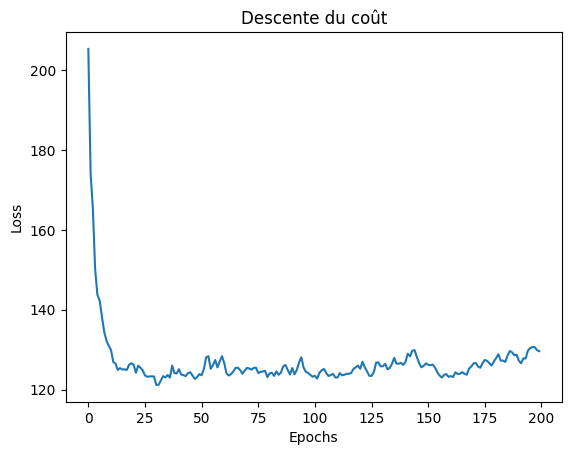

In [67]:
loss_fn = MSELoss()
losses = SGD(autoencoder, loss_fn, X_train_scaled, X_train_scaled, eps=0.01, batch_size=64, n_epochs=200)
# Variation du loss en fonction des epochs
plt.plot(losses)
plt.title("Descente du coût")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Reconstruction 

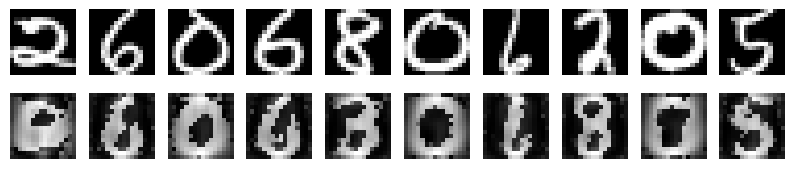

In [68]:
X_rec = autoencoder.forward(X_test_scaled)
X_rec_denorm = scaler.inverse_transform(X_rec)
X_orig_denorm = scaler.inverse_transform(X_test_scaled)

plot_reconstruction(X_orig_denorm, X_rec_denorm, n=10)

Ici on à pu voir et expérimenter sur une architecture d'auto-encoder en normalisant entre -1 et 1, ceci dit une sortie du module qui serait adéquate serait une "Tanh()" et non une sigmoide. Le choix de a loss a été la MSE plutot que la BCE qui ne prends de sortie que sur l'intervalle [0, 1].

Le résultat obtenu montre qu'il ya eu une bonne reconstruction de certaines images seulement.

## Auto-Encoder 2

#### Ici, le but est d'utiliser une sortie "Sigmoide()" plutot qu'une tangente hyperbolique, en utilisant les données normalisées entre [0, 1], pour ca la loss utilisée est une "BCELoss()"

In [69]:
encodeur2 = Sequential(
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 48, init_type=1),
    Tanh()
)

decodeur2 = Sequential(
    Linear( 48, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Sigmoide()
)

autoencoder2 = Sequential(*encodeur2.modules, *decodeur2.modules)

Epoch 1/400, Loss: 0.4281
Epoch 2/400, Loss: 0.1478
Epoch 3/400, Loss: 0.0977
Epoch 4/400, Loss: 0.0781
Epoch 5/400, Loss: 0.0672
Epoch 6/400, Loss: 0.0601
Epoch 7/400, Loss: 0.0550
Epoch 8/400, Loss: 0.0512
Epoch 9/400, Loss: 0.0481
Epoch 10/400, Loss: 0.0457
Epoch 11/400, Loss: 0.0436
Epoch 12/400, Loss: 0.0418
Epoch 13/400, Loss: 0.0403
Epoch 14/400, Loss: 0.0390
Epoch 15/400, Loss: 0.0378
Epoch 16/400, Loss: 0.0368
Epoch 17/400, Loss: 0.0359
Epoch 18/400, Loss: 0.0350
Epoch 19/400, Loss: 0.0343
Epoch 20/400, Loss: 0.0336
Epoch 21/400, Loss: 0.0329
Epoch 22/400, Loss: 0.0324
Epoch 23/400, Loss: 0.0318
Epoch 24/400, Loss: 0.0313
Epoch 25/400, Loss: 0.0308
Epoch 26/400, Loss: 0.0304
Epoch 27/400, Loss: 0.0300
Epoch 28/400, Loss: 0.0296
Epoch 29/400, Loss: 0.0292
Epoch 30/400, Loss: 0.0289
Epoch 31/400, Loss: 0.0285
Epoch 32/400, Loss: 0.0282
Epoch 33/400, Loss: 0.0279
Epoch 34/400, Loss: 0.0277
Epoch 35/400, Loss: 0.0274
Epoch 36/400, Loss: 0.0271
Epoch 37/400, Loss: 0.0269
Epoch 38/4

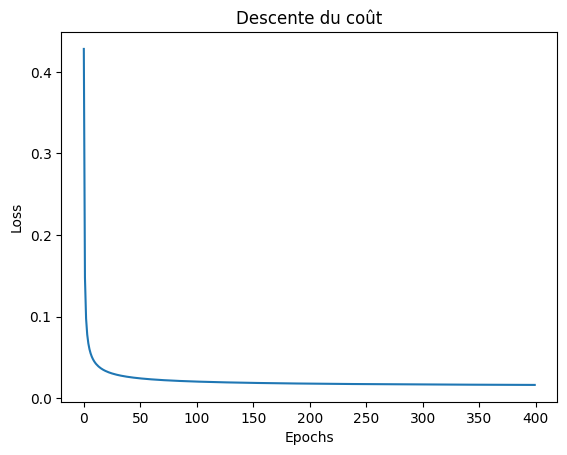

In [70]:
loss2 = BCELoss()
losses2 = SGD(autoencoder2, loss2, X_train, X_train, eps=0.005, batch_size=64, n_epochs=400)

plt.plot(losses2)
plt.title("Descente du coût")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

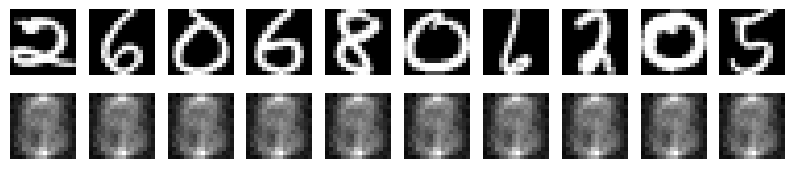

In [71]:
"""
X_rec2 = autoencoder.forward(X_test)
X_rec2_denorm = X_rec2 * 255.0
X_test2_denorm = X_test * 255.0
""" 
X_rec2 = autoencoder2.forward(X_test)
plot_reconstruction(X_test, X_rec2, n=10)

#plot_reconstruction(X_test2_denorm, X_rec2_denorm, n=10)

- On voit qu'on retrouve un meme résultat pour toute les images, ceci pourrait etre la conséquence d'un problème de scaling inadéquat avec notre sortie et/ou notre fonction de loss.

Suite au résultat précédent, on suggère d'essager la meme architecture, sur les données "scaled" donc, normalisées et centrées sur 0. 

## Auto-Encoder 3

Epoch 1/500, Loss: 0.2110
Epoch 2/500, Loss: -0.2095
Epoch 3/500, Loss: -0.3759
Epoch 4/500, Loss: -0.5063
Epoch 5/500, Loss: -0.6252
Epoch 6/500, Loss: -0.7352
Epoch 7/500, Loss: -0.8304
Epoch 8/500, Loss: -0.9115
Epoch 9/500, Loss: -0.9821
Epoch 10/500, Loss: -1.0441
Epoch 11/500, Loss: -1.0999
Epoch 12/500, Loss: -1.1513
Epoch 13/500, Loss: -1.1986
Epoch 14/500, Loss: -1.2422
Epoch 15/500, Loss: -1.2812
Epoch 16/500, Loss: -1.3188
Epoch 17/500, Loss: -1.3521
Epoch 18/500, Loss: -1.3851
Epoch 19/500, Loss: -1.4174
Epoch 20/500, Loss: -1.4496
Epoch 21/500, Loss: -1.4795
Epoch 22/500, Loss: -1.5101
Epoch 23/500, Loss: -1.5383
Epoch 24/500, Loss: -1.5659
Epoch 25/500, Loss: -1.5925
Epoch 26/500, Loss: -1.6178
Epoch 27/500, Loss: -1.6418
Epoch 28/500, Loss: -1.6656
Epoch 29/500, Loss: -1.6880
Epoch 30/500, Loss: -1.7098
Epoch 31/500, Loss: -1.7311
Epoch 32/500, Loss: -1.7516
Epoch 33/500, Loss: -1.7708
Epoch 34/500, Loss: -1.7900
Epoch 35/500, Loss: -1.8085
Epoch 36/500, Loss: -1.8266
Ep

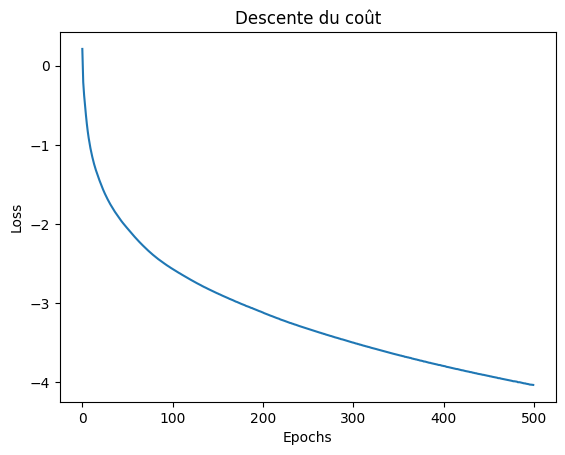

In [72]:
encodeur3 = Sequential(
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 48, init_type=1),
    Tanh()
)

decodeur3 = Sequential(
    Linear( 48, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Sigmoide()
)

autoencoder3 = Sequential(*encodeur3.modules, *decodeur3.modules)

loss3 = BCELoss()
losses3 = SGD(autoencoder3, loss3, X_train_scaled, X_train_scaled, eps=0.01, batch_size=64, n_epochs=500)

plt.plot(losses3)
plt.title("Descente du coût")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

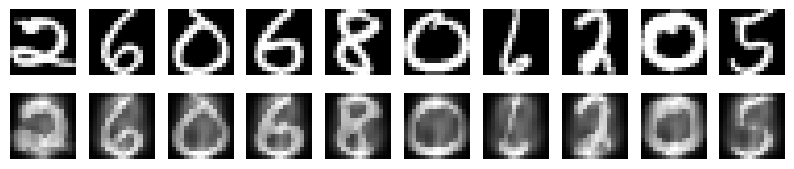

In [ ]:
X_rec3 = autoencoder3.forward(X_test_scaled)
X_rec3_denorm =  scaler.inverse_transform(X_rec3)
X_test2_denorm =  scaler.inverse_transform(X_test_scaled)
plot_reconstruction(X_test2_denorm, X_rec3_denorm, n=10)
#meilleur résultat

- On reconnait assez bien tous les chiffres, résultat innatendu de notre part. Rien n'empeche des labels hors de l'intervalle [0, 1], car le réseau apprends a les caler malgré ca. 
- la sigmoide et la MSE donnent un résultat assez bien sur certains chiffres et pas reconnaissable sur certains d'autres. 

Epoch 1/200, Loss: 0.5709
Epoch 2/200, Loss: 0.4957
Epoch 3/200, Loss: 0.4798
Epoch 4/200, Loss: 0.4600
Epoch 5/200, Loss: 0.4446
Epoch 6/200, Loss: 0.4325
Epoch 7/200, Loss: 0.4211
Epoch 8/200, Loss: 0.4105
Epoch 9/200, Loss: 0.4012
Epoch 10/200, Loss: 0.3929
Epoch 11/200, Loss: 0.3854
Epoch 12/200, Loss: 0.3783
Epoch 13/200, Loss: 0.3717
Epoch 14/200, Loss: 0.3658
Epoch 15/200, Loss: 0.3604
Epoch 16/200, Loss: 0.3555
Epoch 17/200, Loss: 0.3510
Epoch 18/200, Loss: 0.3468
Epoch 19/200, Loss: 0.3428
Epoch 20/200, Loss: 0.3390
Epoch 21/200, Loss: 0.3355
Epoch 22/200, Loss: 0.3322
Epoch 23/200, Loss: 0.3290
Epoch 24/200, Loss: 0.3260
Epoch 25/200, Loss: 0.3231
Epoch 26/200, Loss: 0.3204
Epoch 27/200, Loss: 0.3178
Epoch 28/200, Loss: 0.3153
Epoch 29/200, Loss: 0.3131
Epoch 30/200, Loss: 0.3107
Epoch 31/200, Loss: 0.3086
Epoch 32/200, Loss: 0.3066
Epoch 33/200, Loss: 0.3047
Epoch 34/200, Loss: 0.3029
Epoch 35/200, Loss: 0.3011
Epoch 36/200, Loss: 0.2995
Epoch 37/200, Loss: 0.2979
Epoch 38/2

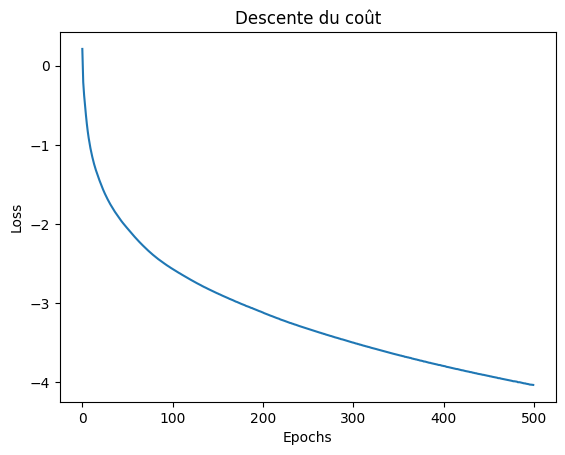

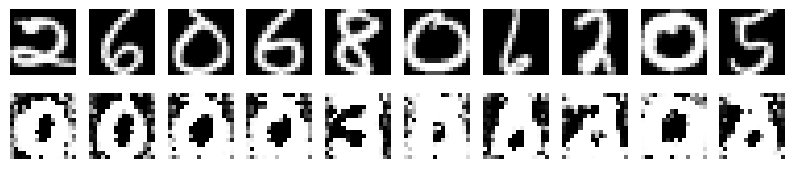

In [74]:
#minaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()  
scaler1.fit(X_train)

X_trainscaled = scaler1.transform(X_train)
X_testscaled = scaler1.transform(X_test)


# Réseau

encodeur4 = Sequential(
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 48, init_type=1),
    Tanh()
)

decodeur4 = Sequential(
    Linear( 48, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Sigmoide()
)

autoencoder4 = Sequential(*encodeur4.modules, *decodeur4.modules)

loss4 = BCELoss()
losses4 = SGD(autoencoder4, loss4, X_trainscaled, X_trainscaled, eps=0.01, batch_size=64, n_epochs=200)

plt.plot(losses3)
plt.title("Descente du coût")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# reconstruction
X_rec4 = autoencoder.forward(X_testscaled)
X_rec_denorm4 = scaler1.inverse_transform(X_rec4)
X_orig_denorm4 = scaler1.inverse_transform(X_testscaled)
plot_reconstruction(X_orig_denorm4, X_rec_denorm4, n=10)


- Peut etre que la BCE n'est pas idéale, car elle pénalise fortement les sorties moyennes.
- Les résultats ne sont pas fameux avec le minMax scaler.

In [2]:
import pandas as pd
from IPython.display import display

#Archtectures utilisées (c'est pour faire l'analogie avec les reconstructions)
resultat_reconstruction = [
    {"Encoder": "256-128-64-48", "Decoder": "48-64-128-256","Données" : "centrées sur 0 (standard scaler)", "init_type": "1", "Activation": "Tanh", "Loss": "MSELoss", "Learning rate": 0.01, "Batch size": 64, "Epochs": 200},
    {"Encoder": "256-128-64-48", "Decoder": "48-64-128-256", "Données" : "dans [0, 1]", "init_type": "1", "Activation": "Tanh + Sigmoide", "Loss": "BCELoss", "Learning rate": 0.005, "Batch size": 64, "Epochs": 400},
    {"Encoder": "256-128-64-48", "Decoder": "48-64-128-256", "Données" : "centrées sur 0 (standard scaler)", "init_type": "1", "Activation": "Tanh", "Loss": "BCEELoss", "Learning rate": 0.01, "Batch size": 64, "Epochs": 500},
    {"Encoder": "256-128-64-48", "Decoder": "48-64-128-256", "Données" : "MinMax scaler", "init_type": "1", "Activation": "Tanh", "Loss": "BCEELoss", "Learning rate": 0.01, "Batch size": 64, "Epochs": 200}
    ]

df = pd.DataFrame(resultat_reconstruction); display(df)

,Encoder,Decoder,Données,init_type,Activation,Loss,Learning rate,Batch size,Epochs
0,256-128-64-48,48-64-128-256,centrées sur 0 (standard scaler),1,Tanh,MSELoss,0.010,64,200
1,256-128-64-48,48-64-128-256,"dans [0, 1]",1,Tanh + Sigmoide,BCELoss,0.005,64,400
2,256-128-64-48,48-64-128-256,centrées sur 0 (standard scaler),1,Tanh,BCEELoss,0.010,64,500
3,256-128-64-48,48-64-128-256,MinMax scaler,1,Tanh,BCEELoss,0.010,64,200


# Clustering et représentations latentes

j'utilise x_test_scaled pour représenter! 

Adjusted Rand Index (ARI) : 0.446
Normalized Mutual Info (NMI) : 0.587


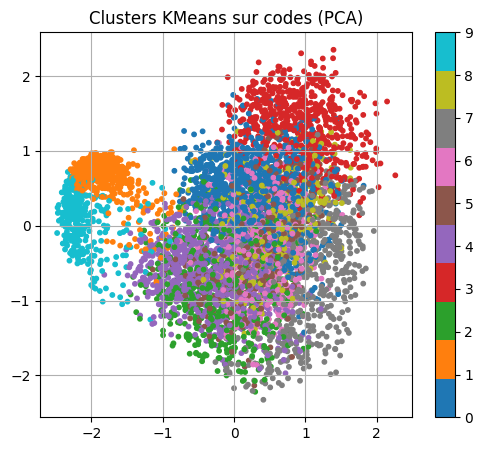

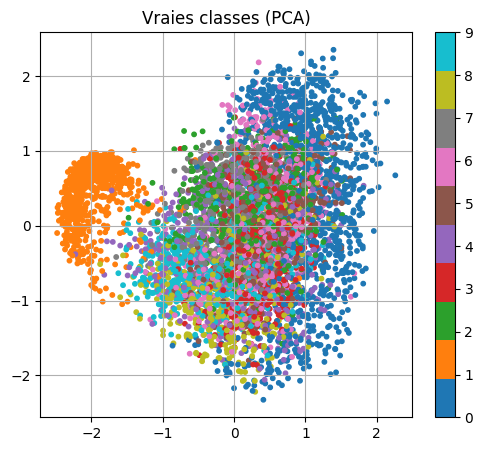

In [75]:

scaler.fit(X * 255.0)
X_scaled = scaler.transform(X * 255.0)
Y = np.argmax(y, axis=1)
codes = encodeur3.forward(X_scaled)

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

# Clustering
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(codes)

# Evaluation
ari = adjusted_rand_score(Y, clusters)
nmi = normalized_mutual_info_score(Y, clusters)

print(f"Adjusted Rand Index (ARI) : {ari:.3f}")
print(f"Normalized Mutual Info (NMI) : {nmi:.3f}")

pca = PCA(n_components=2)
codes_2D = pca.fit_transform(codes)


# Visualisation des clusters trouvés
plt.figure(figsize=(6, 5))
plt.scatter(codes_2D[:, 0], codes_2D[:, 1], c=clusters, cmap='tab10', s=10)
plt.title("Clusters KMeans sur codes (PCA)")
plt.colorbar()
plt.grid(True)
plt.show()

# Visualisation des vraies classes
plt.figure(figsize=(6, 5))
plt.scatter(codes_2D[:, 0], codes_2D[:, 1], c=Y, cmap='tab10', s=10)
plt.title("Vraies classes (PCA)")
plt.colorbar()
plt.grid(True)
plt.show()


- Les résultats ne suggèrent pas vraiment un bon clustering (pas catastrophique non plus). Il est possible que l'encodeur n'aie pas appris des représentations disriminantes, l'objectif n'étant pas de classifier/comprendre les classes, mais de reconstruire. 
- il serait interessant d'essayer de varier la taille de la représentation latente!

#### Variation de l'espace latent 

Epoch 1/400, Loss: 0.2499
Epoch 2/400, Loss: -0.1319
Epoch 3/400, Loss: -0.2708
Epoch 4/400, Loss: -0.3673
Epoch 5/400, Loss: -0.4454
Epoch 6/400, Loss: -0.5135
Epoch 7/400, Loss: -0.5779
Epoch 8/400, Loss: -0.6425
Epoch 9/400, Loss: -0.7091
Epoch 10/400, Loss: -0.7744
Epoch 11/400, Loss: -0.8355
Epoch 12/400, Loss: -0.8911
Epoch 13/400, Loss: -0.9447
Epoch 14/400, Loss: -0.9975
Epoch 15/400, Loss: -1.0484
Epoch 16/400, Loss: -1.0976
Epoch 17/400, Loss: -1.1422
Epoch 18/400, Loss: -1.1850
Epoch 19/400, Loss: -1.2236
Epoch 20/400, Loss: -1.2613
Epoch 21/400, Loss: -1.2951
Epoch 22/400, Loss: -1.3283
Epoch 23/400, Loss: -1.3586
Epoch 24/400, Loss: -1.3877
Epoch 25/400, Loss: -1.4148
Epoch 26/400, Loss: -1.4413
Epoch 27/400, Loss: -1.4662
Epoch 28/400, Loss: -1.4885
Epoch 29/400, Loss: -1.5110
Epoch 30/400, Loss: -1.5334
Epoch 31/400, Loss: -1.5540
Epoch 32/400, Loss: -1.5755
Epoch 33/400, Loss: -1.5969
Epoch 34/400, Loss: -1.6173
Epoch 35/400, Loss: -1.6384
Epoch 36/400, Loss: -1.6596
Ep

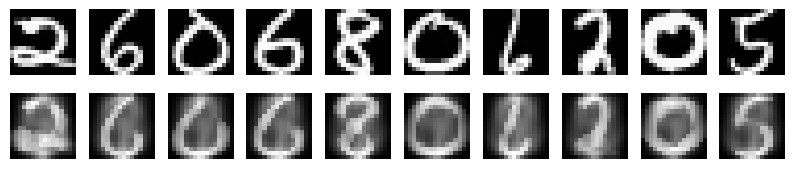

In [76]:
size = 8 #a faire vrier ici
encodeurV = Sequential(
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, size, init_type=1),
    Tanh()
)

decodeurV = Sequential(
    Linear(size, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Sigmoide()
)
autoencodeurV = Sequential(*encodeurV.modules, *decodeurV.modules)
LossV = BCELoss()
lossesV = SGD(autoencodeurV, LossV, X_train_scaled, X_train_scaled, eps=0.01, batch_size=64, n_epochs=400)


X_recV = autoencodeurV.forward(X_test_scaled)
X_recV_denorm =  scaler.inverse_transform(X_recV)
X_testV_denorm =  scaler.inverse_transform(X_test_scaled)
plot_reconstruction(X_testV_denorm, X_recV_denorm, n=10)



Adjusted Rand Index (ARI) : 0.467
Normalized Mutual Info (NMI) : 0.563


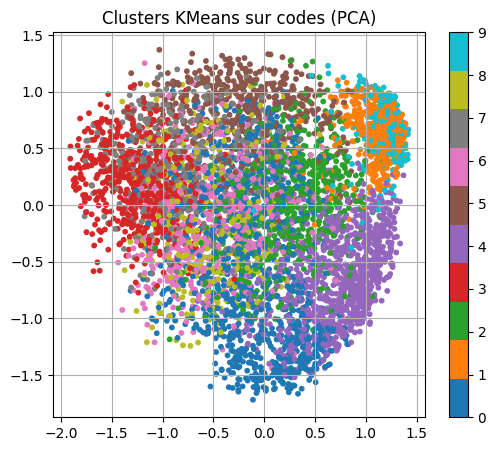

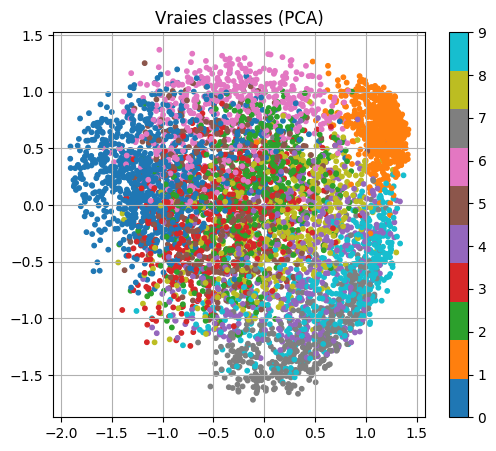

In [77]:
codesV = encodeurV.forward(X_scaled)

clustersV = kmeans.fit_predict(codesV)

# Evaluation
ariV = adjusted_rand_score(Y, clustersV)
nmiV = normalized_mutual_info_score(Y, clustersV)

print(f"Adjusted Rand Index (ARI) : {ariV:.3f}")
print(f"Normalized Mutual Info (NMI) : {nmiV:.3f}")


codes_2D = pca.fit_transform(codesV)


# Visualisation des clusters trouvés
plt.figure(figsize=(6, 5))
plt.scatter(codes_2D[:, 0], codes_2D[:, 1], c=clusters, cmap='tab10', s=10)
plt.title("Clusters KMeans sur codes (PCA)")
plt.colorbar()
plt.grid(True)
plt.show()

# Visualisation des vraies classes
plt.figure(figsize=(6, 5))
plt.scatter(codes_2D[:, 0], codes_2D[:, 1], c=Y, cmap='tab10', s=10)
plt.title("Vraies classes (PCA)")
plt.colorbar()
plt.grid(True)
plt.show()


Adjusted Rand Index (ARI) : 0.534
Normalized Mutual Info (NMI) : 0.630


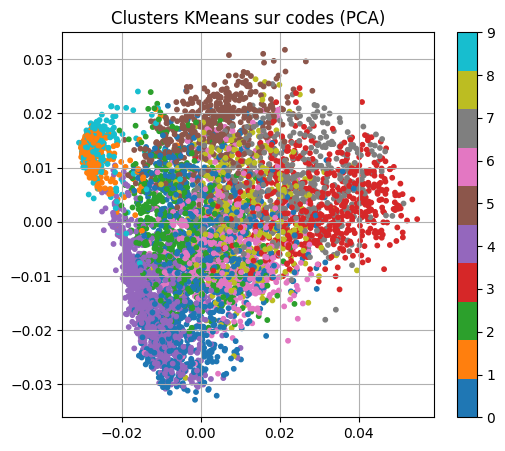

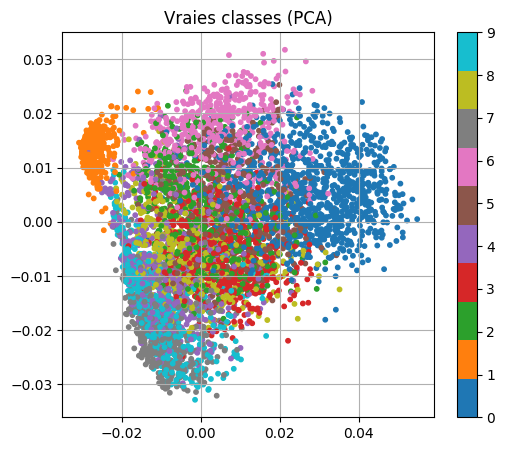

In [78]:
clustersGT = kmeans.fit_predict(X)

# Evaluation
ariGT = adjusted_rand_score(Y, clustersGT)
nmiGT = normalized_mutual_info_score(Y, clustersGT)

print(f"Adjusted Rand Index (ARI) : {ariGT:.3f}")
print(f"Normalized Mutual Info (NMI) : {nmiGT:.3f}")


codes_2D = pca.fit_transform(X)


# Visualisation des clusters trouvés
plt.figure(figsize=(6, 5))
plt.scatter(codes_2D[:, 0], codes_2D[:, 1], c=clusters, cmap='tab10', s=10)
plt.title("Clusters KMeans sur codes (PCA)")
plt.colorbar()
plt.grid(True)
plt.show()

# Visualisation des vraies classes
plt.figure(figsize=(6, 5))
plt.scatter(codes_2D[:, 0], codes_2D[:, 1], c=Y, cmap='tab10', s=10)
plt.title("Vraies classes (PCA)")
plt.colorbar()
plt.grid(True)
plt.show()

Meileur résultat pour le clustering avec les données brutes plutot que la représentation latente.

#### Autre méthode de clustering ?
considérant que le k-means est naif et suppose que les clusters ont des formes sphériques (et repose sur une distance euclidienne), on se propose d'essayer une méthose qui ne supposent rien sur la forme des clusters.

In [79]:
#Clustering par mixture de gaussiennes

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=0)
clusters = gmm.fit_predict(codes)

ari = adjusted_rand_score(Y, clusters)
nmi = normalized_mutual_info_score(Y, clusters)
print(f"ARI GMM : {ari:.3f}, NMI GMM : {nmi:.3f}")

ARI GMM : 0.514, NMI GMM : 0.689


In [80]:
#Clustering agglomératif

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=10)
clusters_agglo = agglo.fit_predict(codes)

ari_agglo = adjusted_rand_score(Y, clusters_agglo)
nmi_agglo = normalized_mutual_info_score(Y, clusters_agglo)
print(f"ARI Agglo : {ari_agglo:.3f}, NMI Agglo : {nmi_agglo:.3f}")

ARI Agglo : 0.550, NMI Agglo : 0.675


# Classification 


In [81]:
# AutoEncoder

enco = Sequential(
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 64, init_type=1),
    Tanh(),
    Linear(64, 32, init_type=1),
    Tanh()
)

deco = Sequential(
    Linear( 32, 64, init_type=1),
    Tanh(),
    Linear(64, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Sigmoide()
)

auto = Sequential(*enco.modules, *deco.modules)

los = BCELoss()
lose = SGD(auto, los, X_train_scaled, X_train_scaled, eps=0.01, batch_size=64, n_epochs=500)



Epoch 1/500, Loss: 0.2252
Epoch 2/500, Loss: -0.1982
Epoch 3/500, Loss: -0.3759
Epoch 4/500, Loss: -0.5190
Epoch 5/500, Loss: -0.6370
Epoch 6/500, Loss: -0.7363
Epoch 7/500, Loss: -0.8234
Epoch 8/500, Loss: -0.9021
Epoch 9/500, Loss: -0.9718
Epoch 10/500, Loss: -1.0342
Epoch 11/500, Loss: -1.0906
Epoch 12/500, Loss: -1.1423
Epoch 13/500, Loss: -1.1896
Epoch 14/500, Loss: -1.2335
Epoch 15/500, Loss: -1.2742
Epoch 16/500, Loss: -1.3128
Epoch 17/500, Loss: -1.3489
Epoch 18/500, Loss: -1.3839
Epoch 19/500, Loss: -1.4175
Epoch 20/500, Loss: -1.4491
Epoch 21/500, Loss: -1.4790
Epoch 22/500, Loss: -1.5081
Epoch 23/500, Loss: -1.5354
Epoch 24/500, Loss: -1.5612
Epoch 25/500, Loss: -1.5872
Epoch 26/500, Loss: -1.6114
Epoch 27/500, Loss: -1.6349
Epoch 28/500, Loss: -1.6583
Epoch 29/500, Loss: -1.6808
Epoch 30/500, Loss: -1.7024
Epoch 31/500, Loss: -1.7242
Epoch 32/500, Loss: -1.7453
Epoch 33/500, Loss: -1.7646
Epoch 34/500, Loss: -1.7840
Epoch 35/500, Loss: -1.8032
Epoch 36/500, Loss: -1.8215
Ep

In [82]:
X_train_codes = enco.forward(X_train_scaled)  
X_test_codes = enco.forward(X_test_scaled)


classifier = Sequential(
    Linear(X_train_codes.shape[1], 64),
    Tanh(),
    Linear(64, 10),
    LogSoftmax()
)

loss_fn = NLLLoss()
losses = SGD(classifier, loss_fn, X_train_codes, y_train, eps=0.01, batch_size=30, n_epochs=300)

from sklearn.metrics import accuracy_score

y_pred = classifier.forward(X_test_codes)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

acc = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy : {acc * 100:.2f}%")

Epoch 1/300, Loss: 1.5955
Epoch 2/300, Loss: 0.4660
Epoch 3/300, Loss: 0.3383
Epoch 4/300, Loss: 0.2646
Epoch 5/300, Loss: 0.2203
Epoch 6/300, Loss: 0.1878
Epoch 7/300, Loss: 0.1652
Epoch 8/300, Loss: 0.1462
Epoch 9/300, Loss: 0.1297
Epoch 10/300, Loss: 0.1179
Epoch 11/300, Loss: 0.1083
Epoch 12/300, Loss: 0.0970
Epoch 13/300, Loss: 0.0891
Epoch 14/300, Loss: 0.0822
Epoch 15/300, Loss: 0.0764
Epoch 16/300, Loss: 0.0705
Epoch 17/300, Loss: 0.0655
Epoch 18/300, Loss: 0.0609
Epoch 19/300, Loss: 0.0568
Epoch 20/300, Loss: 0.0541
Epoch 21/300, Loss: 0.0499
Epoch 22/300, Loss: 0.0469
Epoch 23/300, Loss: 0.0450
Epoch 24/300, Loss: 0.0421
Epoch 25/300, Loss: 0.0396
Epoch 26/300, Loss: 0.0375
Epoch 27/300, Loss: 0.0354
Epoch 28/300, Loss: 0.0336
Epoch 29/300, Loss: 0.0324
Epoch 30/300, Loss: 0.0307
Epoch 31/300, Loss: 0.0294
Epoch 32/300, Loss: 0.0280
Epoch 33/300, Loss: 0.0265
Epoch 34/300, Loss: 0.0258
Epoch 35/300, Loss: 0.0244
Epoch 36/300, Loss: 0.0234
Epoch 37/300, Loss: 0.0222
Epoch 38/3

Trés bon résultat de classification des données dans l'espace latent.

In [83]:

classifier = Sequential(
    Linear(X_train_scaled.shape[1], 64),
    Tanh(),
    Linear(64, 10),
    LogSoftmax()
)

loss_fn = NLLLoss()
losses = SGD(classifier, loss_fn, X_train_scaled, y_train, eps=0.01, batch_size=30, n_epochs=300)

from sklearn.metrics import accuracy_score

y_pred = classifier.forward(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

acc = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy : {acc * 100:.2f}%")

Epoch 1/300, Loss: 2.2310
Epoch 2/300, Loss: 0.6336
Epoch 3/300, Loss: 0.3930
Epoch 4/300, Loss: 0.2669
Epoch 5/300, Loss: 0.2053
Epoch 6/300, Loss: 0.1680
Epoch 7/300, Loss: 0.1448
Epoch 8/300, Loss: 0.1256
Epoch 9/300, Loss: 0.1123
Epoch 10/300, Loss: 0.1005
Epoch 11/300, Loss: 0.0924
Epoch 12/300, Loss: 0.0817
Epoch 13/300, Loss: 0.0754
Epoch 14/300, Loss: 0.0694
Epoch 15/300, Loss: 0.0640
Epoch 16/300, Loss: 0.0596
Epoch 17/300, Loss: 0.0558
Epoch 18/300, Loss: 0.0523
Epoch 19/300, Loss: 0.0491
Epoch 20/300, Loss: 0.0464
Epoch 21/300, Loss: 0.0431
Epoch 22/300, Loss: 0.0403
Epoch 23/300, Loss: 0.0378
Epoch 24/300, Loss: 0.0358
Epoch 25/300, Loss: 0.0343
Epoch 26/300, Loss: 0.0325
Epoch 27/300, Loss: 0.0310
Epoch 28/300, Loss: 0.0295
Epoch 29/300, Loss: 0.0289
Epoch 30/300, Loss: 0.0268
Epoch 31/300, Loss: 0.0255
Epoch 32/300, Loss: 0.0244
Epoch 33/300, Loss: 0.0229
Epoch 34/300, Loss: 0.0220
Epoch 35/300, Loss: 0.0213
Epoch 36/300, Loss: 0.0203
Epoch 37/300, Loss: 0.0197
Epoch 38/3

Remarque : bons résultats dans les deux cas, mais le meilleur reste celui de l'espace latent, ce qui en fait un assez bon descripteur! sachant qu'on classifie des données compréssées.

In [3]:
resultat_classification = resultat_reconstruction = [
    {"Encoder": "256-128-64-32", "Decoder": "32-64-128-256","Données" : "centrées sur 0 (standard scaler)", "init_type": "1", "Activation": "Tanh + Sigmoide", "Loss": "BCELoss", "Learning rate": "0.01", "Batch size": "64", "Epochs": "500", "classifier" : "32-64-10","données": "espace latent", "Activations": "Tanh + LogSoftmax", "Loss": "NLLLoss", "Learning rate": "0.01", "Batch size": "30", "Epochs": "300", "accuracy test": "92.13%"},
    {"Encoder": "256-128-64-32", "Decoder": "32-64-128-256","Données" : "centrées sur 0 (standard scaler)", "init_type": "1", "Activation": "Tanh + Sigmoide", "Loss": "BCELoss", "Learning rate": "0.01", "Batch size": "64", "Epochs": "500", "classifier" : "32-64-10","données": "données cenrées", "Activations": "Tanh + LogSoftmax", "Loss": "NLLLoss", "Learning rate": "0.01", "Batch size": "30", "Epochs": "300", "accuracy test": "88.52%"},
    ]

df = pd.DataFrame(resultat_classification); display(df)

,Encoder,Decoder,Données,init_type,Activation,Loss,Learning rate,Batch size,Epochs,classifier,données,Activations,accuracy test
0,256-128-64-32,32-64-128-256,centrées sur 0 (standard scaler),1,Tanh + Sigmoide,NLLLoss,0.01,30,300,32-64-10,espace latent,Tanh + LogSoftmax,92.13%
1,256-128-64-32,32-64-128-256,centrées sur 0 (standard scaler),1,Tanh + Sigmoide,NLLLoss,0.01,30,300,32-64-10,données cenrées,Tanh + LogSoftmax,88.52%


### Classification sur des visages ? Oui, plus précisément la reconnaissance faciale

In [7]:
# Chargement des données 



## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

X_train = yaleFaces['X_train'].T  # (90, 4096)
X_test = yaleFaces['X_test'].T    # (30, 4096)
y_train = yaleFaces['id_train'][0] - 1  # Labels entre 0 et 14
y_test = yaleFaces['id_test'][0] - 1

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/500, Loss: 0.7084
Epoch 2/500, Loss: 0.0288
Epoch 3/500, Loss: -0.1551
Epoch 4/500, Loss: -0.3484
Epoch 5/500, Loss: -0.5973
Epoch 6/500, Loss: -0.6910
Epoch 7/500, Loss: -0.8201
Epoch 8/500, Loss: -0.8391
Epoch 9/500, Loss: -0.8941
Epoch 10/500, Loss: -0.8946
Epoch 11/500, Loss: -0.9982
Epoch 12/500, Loss: -1.0797
Epoch 13/500, Loss: -1.1177
Epoch 14/500, Loss: -1.1132
Epoch 15/500, Loss: -1.1798
Epoch 16/500, Loss: -1.2796
Epoch 17/500, Loss: -1.3665
Epoch 18/500, Loss: -1.3416
Epoch 19/500, Loss: -1.4033
Epoch 20/500, Loss: -1.4416
Epoch 21/500, Loss: -1.4998
Epoch 22/500, Loss: -1.5453
Epoch 23/500, Loss: -1.5813
Epoch 24/500, Loss: -1.5833
Epoch 25/500, Loss: -1.6219
Epoch 26/500, Loss: -1.6401
Epoch 27/500, Loss: -1.7024
Epoch 28/500, Loss: -1.7026
Epoch 29/500, Loss: -1.7317
Epoch 30/500, Loss: -1.7740
Epoch 31/500, Loss: -1.7850
Epoch 32/500, Loss: -1.8062
Epoch 33/500, Loss: -1.7708
Epoch 34/500, Loss: -1.8634
Epoch 35/500, Loss: -1.8940
Epoch 36/500, Loss: -1.8943
Epo

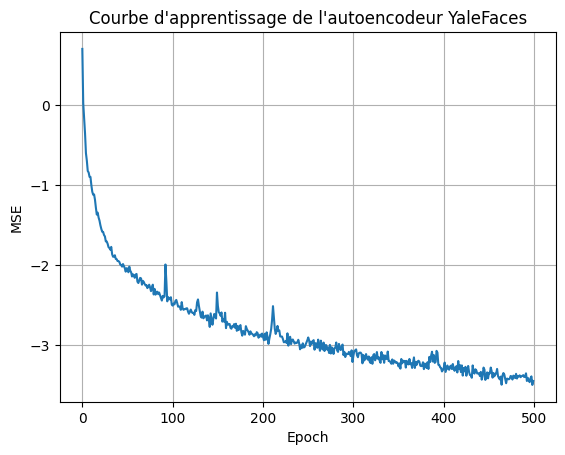

In [8]:

#PREMIER bon résultat avec 4096 - 1024 - 256 - 32
# 4096 - 256 - 128 - 32 ====> 56% en test (96% en train, généralise encore moins bien!)
encoF = Sequential(
    Linear(4096, 1024, init_type=1),
    Tanh(),
    Linear(1024, 256, init_type=1),
    Tanh(),
    Linear(256, 32, init_type=1), 
    Tanh()
)

decoF = Sequential(
    Linear(32, 256, init_type=1),
    Tanh(),
    Linear(256, 1024, init_type=1),
    Tanh(),
    Linear(1024, 4096, init_type=1),
    Sigmoide()
)

autoF = Sequential(*encoF.modules, *decoF.modules)
lossF = BCELoss()

# Entraînement
lossesF = SGD(autoF, lossF, X_train_scaled, X_train_scaled, eps=0.01, batch_size=16, n_epochs=500)

plt.plot(lossesF)
plt.title("Courbe d'apprentissage de l'autoencodeur YaleFaces")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid()
plt.show()

Epoch 1/1500, Loss: 7.2456
Epoch 2/1500, Loss: 1.3778
Epoch 3/1500, Loss: 0.8502
Epoch 4/1500, Loss: 0.5147
Epoch 5/1500, Loss: 0.6084
Epoch 6/1500, Loss: 0.2719
Epoch 7/1500, Loss: 0.2291
Epoch 8/1500, Loss: 0.1753
Epoch 9/1500, Loss: 0.2078
Epoch 10/1500, Loss: 0.1705
Epoch 11/1500, Loss: 0.1990
Epoch 12/1500, Loss: 0.1584
Epoch 13/1500, Loss: 0.1608
Epoch 14/1500, Loss: 0.1336
Epoch 15/1500, Loss: 0.1307
Epoch 16/1500, Loss: 0.1347
Epoch 17/1500, Loss: 0.1209
Epoch 18/1500, Loss: 0.1413
Epoch 19/1500, Loss: 0.1150
Epoch 20/1500, Loss: 0.1049
Epoch 21/1500, Loss: 0.1290
Epoch 22/1500, Loss: 0.1227
Epoch 23/1500, Loss: 0.1202
Epoch 24/1500, Loss: 0.1378
Epoch 25/1500, Loss: 0.1142
Epoch 26/1500, Loss: 0.0752
Epoch 27/1500, Loss: 0.1117
Epoch 28/1500, Loss: 0.1309
Epoch 29/1500, Loss: 0.0981
Epoch 30/1500, Loss: 0.0934
Epoch 31/1500, Loss: 0.0955
Epoch 32/1500, Loss: 0.1122
Epoch 33/1500, Loss: 0.1167
Epoch 34/1500, Loss: 0.0953
Epoch 35/1500, Loss: 0.0900
Epoch 36/1500, Loss: 0.0849
E

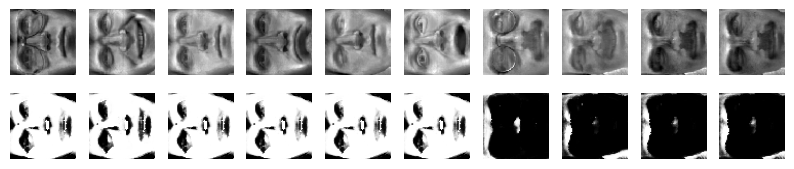

In [ ]:
code_train = encoF.forward(X_train_scaled)
code_test = encoF.forward(X_test_scaled)

#réseau 1 couche cachée donne 70% pour des données trés compréssées!!! (32 de code! et 64 neuronnes dans la couche cachée)
# 76% pour 64 neuronnes dabs la couche cachée! 

classif = Sequential(
    Linear(32, 64, init_type=1),
    Tanh(),
    Linear(64, 15),  # 15 identités
    LogSoftmax()
)


"""
classif = Sequential(
    Linear(32, 128),
    Tanh(),
    Linear(128, 32),
    Tanh(),
    Linear(32, 15),
    LogSoftmax()
)
"""

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))


loss_clf = NLLLoss()
losses_clf = SGD(classif, loss_clf, code_train, y_train_oh, eps=0.008, batch_size=10, n_epochs=1500)

y_pred_train = classif.forward(code_train); predicted_train = np.argmax(y_pred_train, axis=1);print(f"Accuracy train : {np.mean(predicted_train == y_train) * 100:.2f}%")

y_pred_test = classif.forward(code_test)
predicted_classes = np.argmax(y_pred_test, axis=1)
accuracy = np.mean(predicted_classes == y_test)
print(f"Accuracy test : {accuracy * 100:.2f}%")

X_rec = autoF.forward(X_train_scaled)
plot_reconstruction(X_train_scaled, X_rec)




Epoch 1/500, Loss: 0.7589
Epoch 2/500, Loss: 0.4608
Epoch 3/500, Loss: 0.0735
Epoch 4/500, Loss: -0.1265
Epoch 5/500, Loss: -0.2634
Epoch 6/500, Loss: -0.2260
Epoch 7/500, Loss: -0.3484
Epoch 8/500, Loss: -0.4088
Epoch 9/500, Loss: -0.4847
Epoch 10/500, Loss: -0.5566
Epoch 11/500, Loss: -0.5590
Epoch 12/500, Loss: -0.6191
Epoch 13/500, Loss: -0.6519
Epoch 14/500, Loss: -0.6431
Epoch 15/500, Loss: -0.7235
Epoch 16/500, Loss: -0.7593
Epoch 17/500, Loss: -0.8257
Epoch 18/500, Loss: -0.8118
Epoch 19/500, Loss: -0.8529
Epoch 20/500, Loss: -0.8558
Epoch 21/500, Loss: -0.9469
Epoch 22/500, Loss: -0.9864
Epoch 23/500, Loss: -0.9853
Epoch 24/500, Loss: -0.9716
Epoch 25/500, Loss: -1.0217
Epoch 26/500, Loss: -0.9979
Epoch 27/500, Loss: -0.9833
Epoch 28/500, Loss: -0.9380
Epoch 29/500, Loss: -0.9564
Epoch 30/500, Loss: -0.9328
Epoch 31/500, Loss: -1.0537
Epoch 32/500, Loss: -1.0423
Epoch 33/500, Loss: -1.0333
Epoch 34/500, Loss: -1.1358
Epoch 35/500, Loss: -1.1740
Epoch 36/500, Loss: -1.1900
Epoc

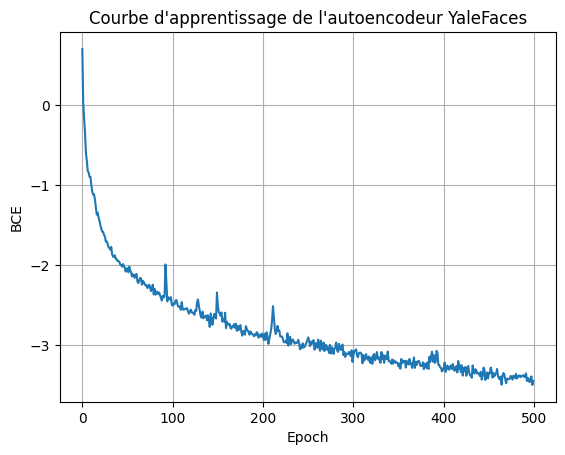

NameError: name 'OneHotEncoder' is not defined

In [ ]:
# Architecture de l'auto encoder qui varie! ici couches moins denses
encoF1 = Sequential(
    Linear(4096, 256, init_type=1),
    Tanh(),
    Linear(256, 128, init_type=1),
    Tanh(),
    Linear(128, 32, init_type=1), 
    Tanh()
)

decoF1 = Sequential(
    Linear(32, 128, init_type=1),
    Tanh(),
    Linear(128, 256, init_type=1),
    Tanh(),
    Linear(256, 4096, init_type=1),
    Sigmoide()
)

autoF1 = Sequential(*encoF1.modules, *decoF1.modules)
lossF1 = BCELoss()

# Entraînement
lossesF1 = SGD(autoF1, lossF1, X_train_scaled, X_train_scaled, eps=0.01, batch_size=16, n_epochs=500)

plt.plot(lossesF)
plt.title("Courbe d'apprentissage de l'autoencodeur YaleFaces")
plt.xlabel("Epoch")
plt.ylabel("BCE")
plt.grid()
plt.show()


classif1 = Sequential(
    Linear(32, 64, init_type=1),
    Tanh(),
    Linear(64, 15),  # 15 identités
    LogSoftmax()
)

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))


loss_clf1 = NLLLoss()
losses_clf1 = SGD(classif1, loss_clf1, code_train, y_train_oh, eps=0.008, batch_size=10, n_epochs=1500)

y_pred_train = classif1.forward(code_train); predicted_train = np.argmax(y_pred_train, axis=1);print(f"Accuracy train : {np.mean(predicted_train == y_train) * 100:.2f}%")

y_pred_test = classif1.forward(code_test)
predicted_classes = np.argmax(y_pred_test, axis=1)
accuracy = np.mean(predicted_classes == y_test)
print(f"Accuracy test : {accuracy * 100:.2f}%")

X_rec = autoF1.forward(X_train_scaled)
plot_reconstruction(X_train_scaled, X_rec)

# ce test a été fait a la dernière minute, donc on a eu pas le temps de le finir et d'en tirer une conclusion 


Architecture simple VS profonde :
- Un résultat meilleur avec l'architecture simple.

En jouant sur la taille de la représetation latente : 
- un code trés grand ne donne pas de bons résultat, environ 57% 
- un code assez petit (impact de la compression) : 32 done les meilleurs résultats (98% en train et 76% en test)
MAIS, un problème se pose 98% est assez loin de 76%, ceci pourrait suggérer de l'overfitting. Plus d'expérimentations seraient alors necessaires!

Aussi, il faut considérer le fait que le dataset ne contient que 120 images, 90 pour le train et 30 pour le test! et c'est ce qui explique peut etre le résultat.
15 classes sur 90 images --> 6 images par classe, ca pose effectivement un problème!

### Valisation avec "early stopping"

Epoch 1/1, Loss: 0.7744
Epoch 1 - Train Loss: 0.7744 | Val Loss: 0.2118
Epoch 1/1, Loss: 0.3464
Epoch 2 - Train Loss: 0.3464 | Val Loss: -0.2718
Epoch 1/1, Loss: -0.1390
Epoch 3 - Train Loss: -0.1390 | Val Loss: -0.2498
Epoch 1/1, Loss: 0.0197
Epoch 4 - Train Loss: 0.0197 | Val Loss: -0.4856
Epoch 1/1, Loss: -0.0071
Epoch 5 - Train Loss: -0.0071 | Val Loss: -0.4918
Epoch 1/1, Loss: -0.3336
Epoch 6 - Train Loss: -0.3336 | Val Loss: -0.5162
Epoch 1/1, Loss: -0.3012
Epoch 7 - Train Loss: -0.3012 | Val Loss: -0.7705
Epoch 1/1, Loss: -0.4608
Epoch 8 - Train Loss: -0.4608 | Val Loss: -0.7955
Epoch 1/1, Loss: -0.5592
Epoch 9 - Train Loss: -0.5592 | Val Loss: -0.7372
Epoch 1/1, Loss: -0.7119
Epoch 10 - Train Loss: -0.7119 | Val Loss: -0.7788
Epoch 1/1, Loss: -0.7489
Epoch 11 - Train Loss: -0.7489 | Val Loss: -0.8037
Epoch 1/1, Loss: -0.7352
Epoch 12 - Train Loss: -0.7352 | Val Loss: -0.8291
Epoch 1/1, Loss: -0.7586
Epoch 13 - Train Loss: -0.7586 | Val Loss: -0.8367
Epoch 1/1, Loss: -0.8724
Epo

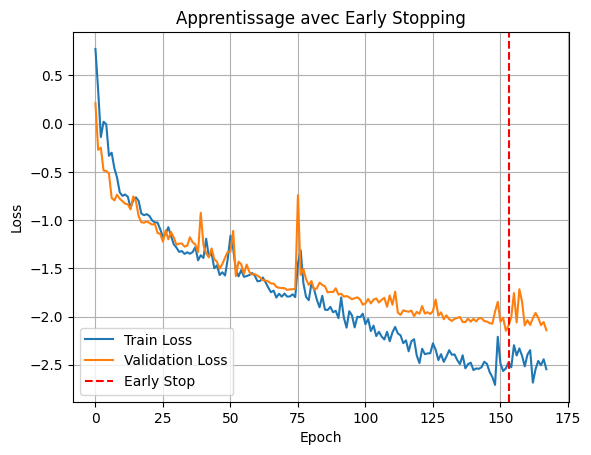

In [87]:


X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)



encoF = Sequential(
    Linear(4096, 1024, init_type=1),
    Tanh(),
    Linear(1024, 256, init_type=1),
    Tanh(),
    Linear(256, 32, init_type=1), 
    Tanh()
)

decoF = Sequential(
    Linear(32, 256, init_type=1),
    Tanh(),
    Linear(256, 1024, init_type=1),
    Tanh(),
    Linear(1024, 4096, init_type=1),
    Sigmoide()
)

autoF = Sequential(*encoF.modules, *decoF.modules)
lossF = BCELoss()

# Entraînement avec early stopping
n_epochs = 500
patience = 15
best_val_loss = np.inf
best_weights = None
lossesF = []
val_losses = []
patience_counter = 0

for epoch in range(n_epochs):
    # Mini-batch training 
    loss_epoch = SGD(autoF, lossF, X_train_final, X_train_final, eps=0.01, batch_size=16, n_epochs=1)
    val_recons = autoF.forward(X_val)
    val_loss = np.mean(lossF.forward(X_val, val_recons))
    
    lossesF.append(loss_epoch[-1])
    val_losses.append(val_loss)
    
    print(f"Epoch {epoch+1} - Train Loss: {loss_epoch[-1]:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = [np.copy(layer._parameters) for layer in autoF.modules if hasattr(layer, '_parameters')]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"\n Early stopping at epoch {epoch+1}")
            break

# Restauration des meilleurs poids
i = 0
for layer in autoF.modules:
    if hasattr(layer, '_parameters'):
        layer._parameters = best_weights[i]
        i += 1

# Affichage des pertes
plt.plot(lossesF, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.axvline(len(val_losses) - patience, color='r', linestyle='--', label="Early Stop")
plt.title("Apprentissage avec Early Stopping")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()




In [88]:
code_train = encoF.forward(X_train_final)
code_val = encoF.forward(X_val)
code_test = encoF.forward(X_test_scaled)

clf = Sequential(
    Linear(32, 64, init_type=1),
    Tanh(),
    Linear(64, 15, init_type=1),
    LogSoftmax()
)

loss_clf = NLLLoss()
losses_clf = SGD(clf, loss_clf, code_train, y_train_oh, eps=0.005, batch_size=10, n_epochs=1500)

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train_final.reshape(-1, 1))
y_val_oh = encoder.transform(y_val.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))

# Évaluation
def evaluate(model, X, y_true):
    y_pred = model.forward(X)
    predicted = np.argmax(y_pred, axis=1)
    return np.mean(predicted == y_true) * 100

acc_train = evaluate(clf, code_train, y_train_final)
acc_val = evaluate(clf, code_val, y_val)
acc_test = evaluate(clf, code_test, y_test)

print(f"Accuracy Train : {acc_train:.2f}%")
print(f"Accuracy Val   : {acc_val:.2f}%")
print(f"Accuracy Test  : {acc_test:.2f}%")



Epoch 1/1500, Loss: 3.2245
Epoch 2/1500, Loss: 3.0416
Epoch 3/1500, Loss: 2.9417
Epoch 4/1500, Loss: 2.8104
Epoch 5/1500, Loss: 2.6243
Epoch 6/1500, Loss: 2.7207
Epoch 7/1500, Loss: 2.5899
Epoch 8/1500, Loss: 2.5978
Epoch 9/1500, Loss: 2.4991
Epoch 10/1500, Loss: 2.3598
Epoch 11/1500, Loss: 2.3919
Epoch 12/1500, Loss: 2.3751
Epoch 13/1500, Loss: 2.3056
Epoch 14/1500, Loss: 2.2332
Epoch 15/1500, Loss: 2.2212
Epoch 16/1500, Loss: 2.2798
Epoch 17/1500, Loss: 2.1098
Epoch 18/1500, Loss: 2.1241
Epoch 19/1500, Loss: 2.1075
Epoch 20/1500, Loss: 2.2073
Epoch 21/1500, Loss: 2.1364
Epoch 22/1500, Loss: 2.0220
Epoch 23/1500, Loss: 2.1518
Epoch 24/1500, Loss: 1.9604
Epoch 25/1500, Loss: 1.9650
Epoch 26/1500, Loss: 1.9949
Epoch 27/1500, Loss: 1.9710
Epoch 28/1500, Loss: 1.9586
Epoch 29/1500, Loss: 1.9586
Epoch 30/1500, Loss: 1.8506
Epoch 31/1500, Loss: 1.8984
Epoch 32/1500, Loss: 1.8796
Epoch 33/1500, Loss: 1.8657
Epoch 34/1500, Loss: 1.8084
Epoch 35/1500, Loss: 1.7770
Epoch 36/1500, Loss: 1.7646
E

Visiblement le problème n'est pas résolu. notre dataset reste quabd meme trés petit.

### Data-augmentation

Epoch 1/250, Loss: 0.3891
Epoch 2/250, Loss: -0.2400
Epoch 3/250, Loss: -0.5004
Epoch 4/250, Loss: -0.5772
Epoch 5/250, Loss: -0.6997
Epoch 6/250, Loss: -0.8613
Epoch 7/250, Loss: -0.9463
Epoch 8/250, Loss: -0.9174
Epoch 9/250, Loss: -1.1446
Epoch 10/250, Loss: -1.2102
Epoch 11/250, Loss: -1.3201
Epoch 12/250, Loss: -1.3437
Epoch 13/250, Loss: -1.3798
Epoch 14/250, Loss: -1.3706
Epoch 15/250, Loss: -1.4416
Epoch 16/250, Loss: -1.5267
Epoch 17/250, Loss: -1.4732
Epoch 18/250, Loss: -1.5350
Epoch 19/250, Loss: -1.5979
Epoch 20/250, Loss: -1.6167
Epoch 21/250, Loss: -1.6869
Epoch 22/250, Loss: -1.7445
Epoch 23/250, Loss: -1.6515
Epoch 24/250, Loss: -1.7531
Epoch 25/250, Loss: -1.6825
Epoch 26/250, Loss: -1.7375
Epoch 27/250, Loss: -1.6932
Epoch 28/250, Loss: -1.7323
Epoch 29/250, Loss: -1.7652
Epoch 30/250, Loss: -1.8629
Epoch 31/250, Loss: -1.8930
Epoch 32/250, Loss: -1.7864
Epoch 33/250, Loss: -1.9063
Epoch 34/250, Loss: -1.8287
Epoch 35/250, Loss: -1.8566
Epoch 36/250, Loss: -1.8839
Ep

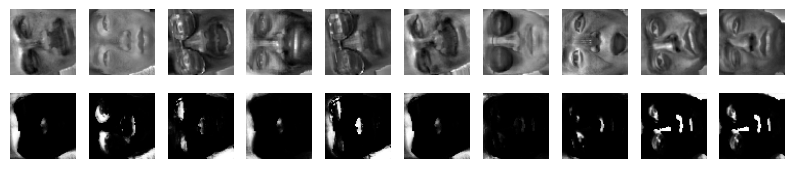

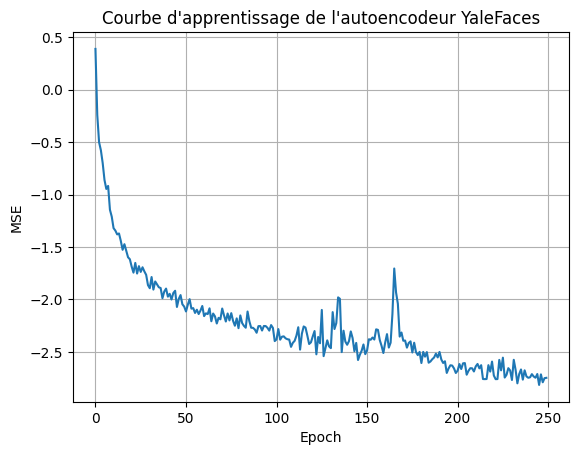

In [89]:
from Evalu_Visu import augment_and_noisy_images
# N --> Nx5
X_train_aug, y_train_aug = augment_and_noisy_images(X_train_scaled, y_train, rotations= [10])

encoF = Sequential(
    Linear(4096, 1024, init_type=1),
    Tanh(),
    Linear(1024, 256, init_type=1),
    Tanh(),
    Linear(256, 32, init_type=1), 
    Tanh()
)

decoF = Sequential(
    Linear(32, 256, init_type=1),
    Tanh(),
    Linear(256, 1024, init_type=1),
    Tanh(),
    Linear(1024, 4096, init_type=1),
    Sigmoide()
)

autoF = Sequential(*encoF.modules, *decoF.modules)
lossF = BCELoss()

# Entraînement
lossesF = SGD(autoF, lossF, X_train_aug, X_train_aug, eps=0.01, batch_size=16, n_epochs=250)

X_rec_aug = autoF.forward(X_train_aug)
plot_reconstruction(X_train_aug, X_rec_aug)

plt.plot(lossesF)
plt.title("Courbe d'apprentissage de l'autoencodeur YaleFaces")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid()
plt.show()


In [90]:
code_train = encoF.forward(X_train_aug)
code_test = encoF.forward(X_test_scaled)


classif = Sequential(
    Linear(32, 64, init_type=1),
    Tanh(),
    Linear(64, 15),  # 15 identités
    LogSoftmax()
)


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train_aug.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))


loss_clf = NLLLoss()
losses_clf = SGD(classif, loss_clf, code_train, y_train_oh, eps=0.008, batch_size=10, n_epochs=1500)

y_pred_train = classif.forward(code_train); predicted_train = np.argmax(y_pred_train, axis=1);print(f"Accuracy train : {np.mean(predicted_train == y_train_aug) * 100:.2f}%")

y_pred_test = classif.forward(code_test)
predicted_classes = np.argmax(y_pred_test, axis=1)
accuracy = np.mean(predicted_classes == y_test)
print(f"Accuracy test : {accuracy * 100:.2f}%")

Epoch 1/1500, Loss: 3.6630
Epoch 2/1500, Loss: 1.7146
Epoch 3/1500, Loss: 0.9662
Epoch 4/1500, Loss: 0.6885
Epoch 5/1500, Loss: 0.6634
Epoch 6/1500, Loss: 0.4832
Epoch 7/1500, Loss: 0.5920
Epoch 8/1500, Loss: 0.5031
Epoch 9/1500, Loss: 0.4279
Epoch 10/1500, Loss: 0.4448
Epoch 11/1500, Loss: 0.4135
Epoch 12/1500, Loss: 0.4271
Epoch 13/1500, Loss: 0.4236
Epoch 14/1500, Loss: 0.4501
Epoch 15/1500, Loss: 0.3923
Epoch 16/1500, Loss: 0.4258
Epoch 17/1500, Loss: 0.4476
Epoch 18/1500, Loss: 0.3656
Epoch 19/1500, Loss: 0.4191
Epoch 20/1500, Loss: 0.3660
Epoch 21/1500, Loss: 0.4077
Epoch 22/1500, Loss: 0.3711
Epoch 23/1500, Loss: 0.3418
Epoch 24/1500, Loss: 0.3680
Epoch 25/1500, Loss: 0.3503
Epoch 26/1500, Loss: 0.3658
Epoch 27/1500, Loss: 0.3309
Epoch 28/1500, Loss: 0.3456
Epoch 29/1500, Loss: 0.3391
Epoch 30/1500, Loss: 0.3638
Epoch 31/1500, Loss: 0.3268
Epoch 32/1500, Loss: 0.3181
Epoch 33/1500, Loss: 0.3303
Epoch 34/1500, Loss: 0.3512
Epoch 35/1500, Loss: 0.3274
Epoch 36/1500, Loss: 0.3294
E